## SimpleImputer
### This notebook outlines the usage of Simple Imputer (Univariate Imputation).
### Simple Imputer substitutes missing values statistics (mean, median, ...)
#### Dataset: [https://github.com/subashgandyer/datasets/blob/main/heart_disease.csv]

**Demographic**
- Sex: male or female(Nominal)
- Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

**Behavioral**
- Current Smoker: whether or not the patient is a current smoker (Nominal)
- Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

**Medical(history)**
- BP Meds: whether or not the patient was on blood pressure medication (Nominal)
- Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
- Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
- Diabetes: whether or not the patient had diabetes (Nominal)

**Medical(current)**
- Tot Chol: total cholesterol level (Continuous)
- Sys BP: systolic blood pressure (Continuous)
- Dia BP: diastolic blood pressure (Continuous)
- BMI: Body Mass Index (Continuous)
- Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
- Glucose: glucose level (Continuous)

**Predict variable (desired target)**
- 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

In [183]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [184]:
heart_disease = pd.read_csv('heart_disease.csv')
print(heart_disease)

      male  age  education  currentSmoker  cigsPerDay  BPMeds  \
0        1   39        4.0              0         0.0     0.0   
1        0   46        2.0              0         0.0     0.0   
2        1   48        1.0              1        20.0     0.0   
3        0   61        3.0              1        30.0     0.0   
4        0   46        3.0              1        23.0     0.0   
...    ...  ...        ...            ...         ...     ...   
4233     1   50        1.0              1         1.0     0.0   
4234     1   51        3.0              1        43.0     0.0   
4235     0   48        2.0              1        20.0     NaN   
4236     0   44        1.0              1        15.0     0.0   
4237     0   52        2.0              0         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    195.0  106.0   70.0  26.97   
1                   0             0         0    250.0  121.0

### How many Categorical variables in the dataset?

In [185]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


### How many Missing values in the dataset?
Hint: df.Series.isna( ).sum( )

In [186]:
for i in range(len(heart_disease.columns)):
    missing_data = heart_disease[heart_disease.columns[i]].isna().sum()
    perc = missing_data / len(heart_disease) * 100
    print(f'Feature {i+1} >> Missing entries: {missing_data}  |  Percentage: {round(perc, 2)}')

Feature 1 >> Missing entries: 0  |  Percentage: 0.0
Feature 2 >> Missing entries: 0  |  Percentage: 0.0
Feature 3 >> Missing entries: 105  |  Percentage: 2.48
Feature 4 >> Missing entries: 0  |  Percentage: 0.0
Feature 5 >> Missing entries: 29  |  Percentage: 0.68
Feature 6 >> Missing entries: 53  |  Percentage: 1.25
Feature 7 >> Missing entries: 0  |  Percentage: 0.0
Feature 8 >> Missing entries: 0  |  Percentage: 0.0
Feature 9 >> Missing entries: 0  |  Percentage: 0.0
Feature 10 >> Missing entries: 50  |  Percentage: 1.18
Feature 11 >> Missing entries: 0  |  Percentage: 0.0
Feature 12 >> Missing entries: 0  |  Percentage: 0.0
Feature 13 >> Missing entries: 19  |  Percentage: 0.45
Feature 14 >> Missing entries: 1  |  Percentage: 0.02
Feature 15 >> Missing entries: 388  |  Percentage: 9.16
Feature 16 >> Missing entries: 0  |  Percentage: 0.0


 Visual representation of missing values

<Axes: >

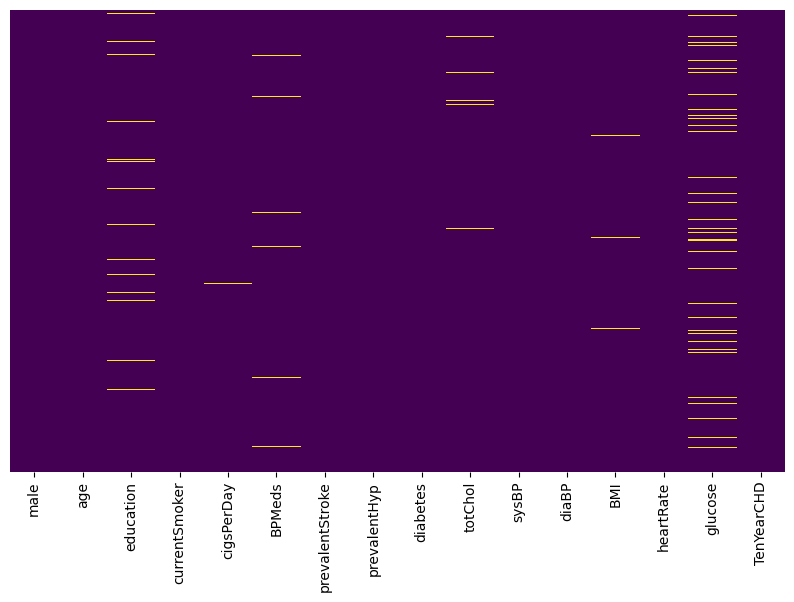

In [187]:
plt.figure(figsize=(10,6))
sns.heatmap(heart_disease.isna(), cbar=False, cmap='viridis', yticklabels=False)

### Import SimpleImputer

In [188]:
from sklearn.impute import SimpleImputer

### Create SimpleImputer object with 'mean' strategy

In [189]:
imputer = SimpleImputer(strategy='mean')

### Optional - converting df into numpy array (There is a way to directly impute from dataframe as well)

In [190]:
data = heart_disease.values

In [191]:
X = data[:, :-1]
y = data[:, -1]
print(data)

[[  1.  39.   4. ...  80.  77.   0.]
 [  0.  46.   2. ...  95.  76.   0.]
 [  1.  48.   1. ...  75.  70.   0.]
 ...
 [  0.  48.   2. ...  84.  86.   0.]
 [  0.  44.   1. ...  86.  nan   0.]
 [  0.  52.   2. ...  80. 107.   0.]]


### Fit the imputer model on dataset to calculate statistic for each column

In [192]:
imputer.fit(X)

SimpleImputer()

### Trained imputer model is applied to dataset to create a copy of dataset with all filled missing values from the calculated statistic using transform( ) 

In [193]:
X_imputed = imputer.transform(X)

### Sanity Check: Whether missing values are filled or not

In [194]:
sum(np.isnan(X).flatten())

645

In [195]:
sum(np.isnan(X_imputed).flatten())

0

### Let's try to visualize the missing values.

<Axes: >

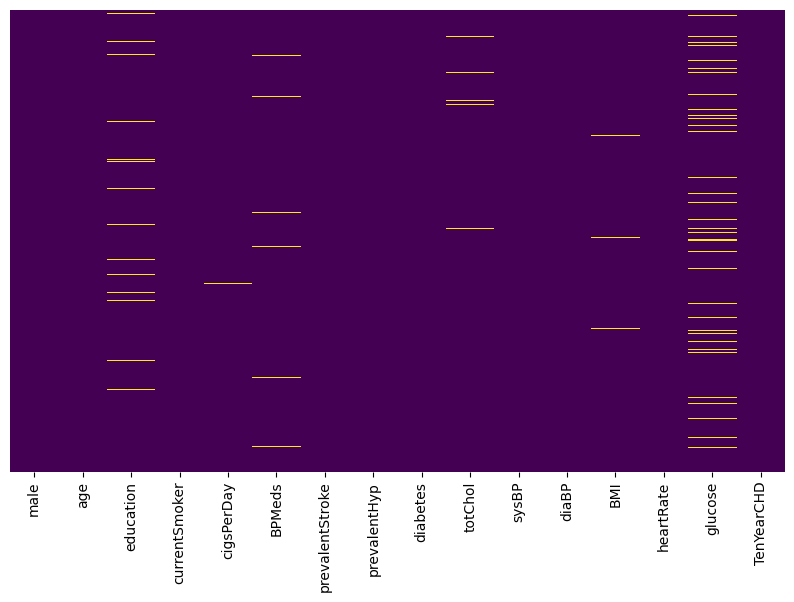

In [196]:
plt.figure(figsize=(10,6))
sns.heatmap(heart_disease.isna(), cbar=False, cmap='viridis', yticklabels=False)

<Axes: >

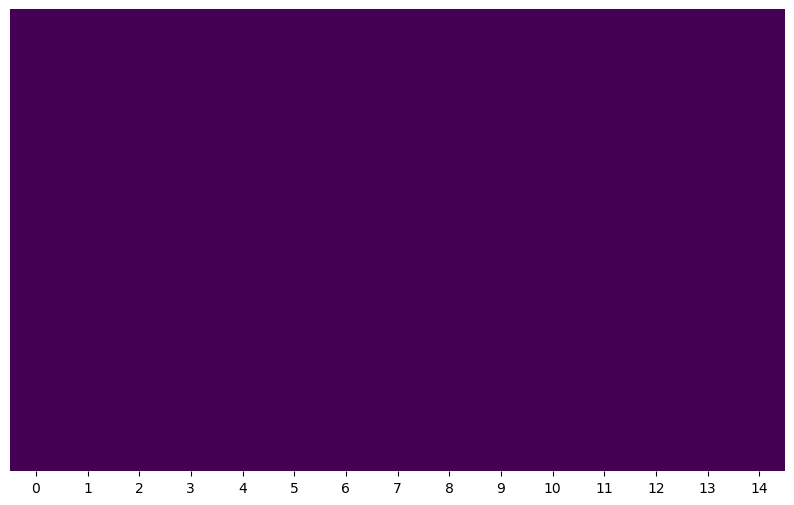

In [197]:
plt.figure(figsize=(10, 6))
sns.heatmap(np.isnan(X_imputed), cbar=False, cmap='viridis', yticklabels=False)

### What's the issue here?


In [198]:
df_imputed = pd.DataFrame(data = X_imputed, columns=heart_disease.columns[:-1])
df_imputed

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1.0,39.0,4.0,0.0,0.0,0.00000,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.000000
1,0.0,46.0,2.0,0.0,0.0,0.00000,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.000000
2,1.0,48.0,1.0,1.0,20.0,0.00000,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.000000
3,0.0,61.0,3.0,1.0,30.0,0.00000,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.000000
4,0.0,46.0,3.0,1.0,23.0,0.00000,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1.0,50.0,1.0,1.0,1.0,0.00000,0.0,1.0,0.0,313.0,179.0,92.0,25.97,66.0,86.000000
4234,1.0,51.0,3.0,1.0,43.0,0.00000,0.0,0.0,0.0,207.0,126.5,80.0,19.71,65.0,68.000000
4235,0.0,48.0,2.0,1.0,20.0,0.02963,0.0,0.0,0.0,248.0,131.0,72.0,22.00,84.0,86.000000
4236,0.0,44.0,1.0,1.0,15.0,0.00000,0.0,0.0,0.0,210.0,126.5,87.0,19.16,86.0,81.966753


<Axes: >

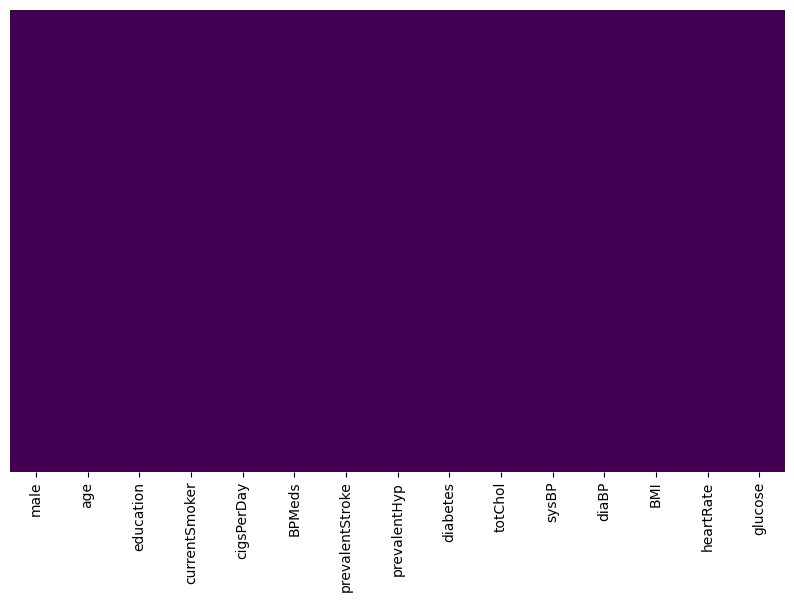

In [199]:
plt.figure(figsize=(10,6))
sns.heatmap(df_imputed.isna(), cbar=False, cmap='viridis', yticklabels=False)

# Check if these datasets contain missing data
### Load the datasets

In [200]:
X_train = pd.read_csv("X_train.csv")
Y_train = pd.read_csv("Y_train.csv")
Y_test = pd.read_csv("Y_test.csv")
X_test = pd.read_csv("X_test.csv")

In [201]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((384, 12), (384, 1), (96, 12), (96, 1))

<Axes: >

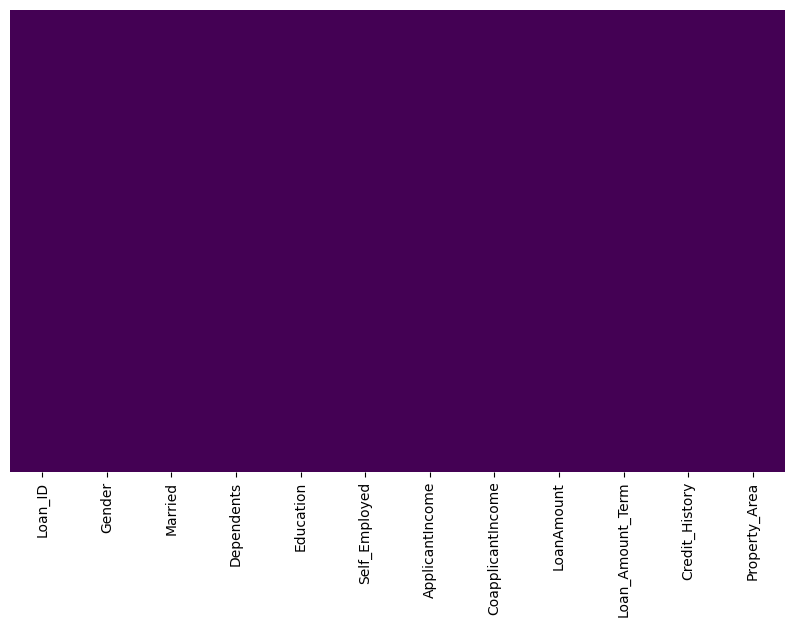

In [202]:
plt.figure(figsize=(10,6))
sns.heatmap(X_train.isna(), cbar=False, cmap='viridis', yticklabels=False)

# Build a Logistic Regression model Without imputation

In [ ]:
df=pd.read_csv("heart_disease.csv")
df_imputed.fillna(df_imputed.mean(), inplace=True)
print(df_imputed.isna().sum())
X = df_imputed[df_imputed.columns[:-1]]
y = df_imputed[df_imputed.columns[-1]]
y_binary = (y > y.mean()).astype(int)
print(y_binary.unique())

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X, y_binary)

# Drop all rows with missing entries - Build a Logistic Regression model and benchmark the accuracy

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

In [ ]:
df=pd.read_csv("heart_disease.csv")
df

In [ ]:
df.shape

### Drop rows with missing values

In [ ]:
df = df.dropna()
df.shape

### Split dataset into X and y

In [ ]:
X = df[df.columns[:-1]]
X.shape

In [ ]:
y = df[df.columns[-1]]
y.shape

### Create a pipeline with model parameter

In [204]:
model = LogisticRegression()
pipe = Pipeline([('model', model)])

### Create a RepeatedStratifiedKFold with 10 splits and 3 repeats and random_state=1

In [205]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=2)

In [207]:
scores

array([0.63207547, 0.72169811, 0.7004717 , 0.67924528, 0.64622642,
       0.7004717 , 0.7004717 , 0.68632075, 0.65957447, 0.70921986,
       0.70283019, 0.6745283 , 0.67924528, 0.70518868, 0.68396226,
       0.66981132, 0.69339623, 0.68160377, 0.71631206, 0.63120567,
       0.68867925, 0.65566038, 0.66273585, 0.69575472, 0.66981132,
       0.71226415, 0.68867925, 0.69811321, 0.67375887, 0.69739953])

### Print the Mean Accuracy and Standard Deviation from scores

In [208]:
print(f"Mean Accuracy: {round(np.mean(scores), 3)}  | Std: {round(np.std(scores), 3)}")

Mean Accuracy: 0.684  | Std: 0.023


# Build a Logistic Regression model with SimpleImputer Mean Strategy

In [209]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

In [210]:
df=pd.read_csv("heart_disease.csv")
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


### Split dataset into X and y

In [211]:
df.shape

(4238, 16)

In [212]:
df = df.dropna()

In [213]:
y = df[df.columns[-1]]
y

0       0
1       0
2       0
3       1
4       0
       ..
4231    0
4232    1
4233    1
4234    0
4237    0
Name: TenYearCHD, Length: 3656, dtype: int64

### Create a SimpleImputer with mean strategy

In [214]:
imputer = SimpleImputer(strategy='mean')

### Create a Logistic Regression model

In [215]:
model = LogisticRegression()

### Create a pipeline with impute and model parameters

In [216]:
pipe = Pipeline([('impute', imputer), ('model',model)])

### Create a RepeatedStratifiedKFold with 10 splits and 3 repeats and random_state=1

In [217]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [219]:
scores

array([0.63207547, 0.72169811, 0.7004717 , 0.67924528, 0.64622642,
       0.7004717 , 0.7004717 , 0.68632075, 0.65957447, 0.70921986,
       0.70283019, 0.6745283 , 0.67924528, 0.70518868, 0.68396226,
       0.66981132, 0.69339623, 0.68160377, 0.71631206, 0.63120567,
       0.68867925, 0.65566038, 0.66273585, 0.69575472, 0.66981132,
       0.71226415, 0.68867925, 0.69811321, 0.67375887, 0.69739953])

### Print the Mean Accuracy and Standard Deviation

In [220]:
print(f"Mean Accuracy: {round(np.mean(scores), 3)}  | Std: {round(np.std(scores), 3)}")

Mean Accuracy: 0.684  | Std: 0.023


# SimpleImputer Mean - Benchmark after Mean imputation with RandomForest

### Import libraries

In [222]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

### Create a SimpleImputer with mean strategy

In [223]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

### Create a RandomForest model

In [224]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = df_imputed.drop('male', axis=1)  # Features
y = df_imputed['male']  # Target variable


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf_model = RandomForestClassifier(random_state=42)


rf_model.fit(X_train, y_train)


y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy:.3f}")

Random Forest Accuracy: 0.695


### Create a pipeline

In [225]:
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with mean
    ('classifier', RandomForestClassifier(random_state=42))  # Random Forest Classifier
])

### Create RepeatedStratifiedKFold

In [226]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

### Create Cross_val_score

In [227]:
scores = cross_val_score(pipe, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

### Print Mean Accuracy and Standard Deviation

In [228]:
print(f"Mean Accuracy: {round(np.mean(scores), 3)}  | Std: {round(np.std(scores), 3)}")

Mean Accuracy: 0.686  | Std: 0.021


# Assignment
# Run experiments with different Strategies and different algorithms

## STRATEGIES
- Mean
- Median
- Most_frequent
- Constant

## ALGORITHMS
- Logistic Regression
- KNN
- Random Forest
- SVM
- Any other algorithm of your choice

In [229]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
import numpy as np

# Strategies
strategies = ['mean', 'median', 'most_frequent', 'constant']

# Algorithms
algorithms = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
}

# Iterate over strategies and algorithms
for strategy in strategies:
    for algo_name, algorithm in algorithms.items():
        # Create a pipeline
        pipeline = Pipeline([
            ('imputer', SimpleImputer(strategy=strategy, fill_value=0)),
            ('classifier', algorithm)
        ])

        # Create RepeatedStratifiedKFold
        rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42)

        # Cross_val_score
        cv_results = cross_val_score(pipeline, X, y, cv=rskf, scoring='accuracy')

        # Print results
        print(f"Strategy: {strategy}, Algorithm: {algo_name}")
        print("Mean Accuracy: ", np.mean(cv_results))
        print("Standard Deviation: ", np.std(cv_results))
        print("----")

D:\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

Strategy: mean, Algorithm: Logistic Regression
Mean Accuracy:  0.6823006137262377
Standard Deviation:  0.011908863368804338
----
Strategy: mean, Algorithm: KNN
Mean Accuracy:  0.6345688218100812
Standard Deviation:  0.018440649545235284
----
Strategy: mean, Algorithm: Random Forest
Mean Accuracy:  0.713619340225606
Standard Deviation:  0.017873843620767205
----
Strategy: mean, Algorithm: SVM
Mean Accuracy:  0.6781949646042176
Standard Deviation:  0.019289847416120196
----


D:\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

Strategy: median, Algorithm: Logistic Regression
Mean Accuracy:  0.6823006137262377
Standard Deviation:  0.011908863368804338
----
Strategy: median, Algorithm: KNN
Mean Accuracy:  0.6345688218100812
Standard Deviation:  0.018440649545235284
----
Strategy: median, Algorithm: Random Forest
Mean Accuracy:  0.7159439872022008
Standard Deviation:  0.018489388754929396
----
Strategy: median, Algorithm: SVM
Mean Accuracy:  0.6781949646042176
Standard Deviation:  0.019289847416120196
----


D:\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

Strategy: most_frequent, Algorithm: Logistic Regression
Mean Accuracy:  0.6823006137262377
Standard Deviation:  0.011908863368804338
----
Strategy: most_frequent, Algorithm: KNN
Mean Accuracy:  0.6345688218100812
Standard Deviation:  0.018440649545235284
----
Strategy: most_frequent, Algorithm: Random Forest
Mean Accuracy:  0.7145733817736015
Standard Deviation:  0.021016146510353065
----
Strategy: most_frequent, Algorithm: SVM
Mean Accuracy:  0.6781949646042176
Standard Deviation:  0.019289847416120196
----


D:\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

Strategy: constant, Algorithm: Logistic Regression
Mean Accuracy:  0.6823006137262377
Standard Deviation:  0.011908863368804338
----
Strategy: constant, Algorithm: KNN
Mean Accuracy:  0.6345688218100812
Standard Deviation:  0.018440649545235284
----
Strategy: constant, Algorithm: Random Forest
Mean Accuracy:  0.7126600659325872
Standard Deviation:  0.018681453235301328
----
Strategy: constant, Algorithm: SVM
Mean Accuracy:  0.6781949646042176
Standard Deviation:  0.019289847416120196
----


# Q1: Which is the best strategy for this dataset using Random Forest algorithm?
- MEAN
- MEDIAN
- MOST_FREQUENT
- CONSTANT

In [230]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
import numpy as np

# Strategies
strategies = ['mean', 'median', 'most_frequent', 'constant']

# Random Forest algorithm
rf_algorithm = RandomForestClassifier()

# Store results for each strategy
results = {}

# Iterate over strategies
for strategy in strategies:
    # Create a pipeline
    pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy=strategy, fill_value=0)),
        ('classifier', rf_algorithm)
    ])

    # Create RepeatedStratifiedKFold
    rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42)

    # Cross_val_score
    cv_results = cross_val_score(pipeline, X, y, cv=rskf, scoring='accuracy')

    # Store mean accuracy for each strategy
    results[strategy] = np.mean(cv_results)

# Print results
for strategy, mean_accuracy in results.items():
    print(f"Strategy: {strategy}, Mean Accuracy: {mean_accuracy}")

# Find the best strategy
best_strategy = max(results, key=results.get)
print(f"\nBest Strategy for Random Forest: {best_strategy}")
#The best strategy is the one with the highest mean accuracy

Strategy: mean, Mean Accuracy: 0.7145756243786116
Strategy: median, Mean Accuracy: 0.7143016527998924
Strategy: most_frequent, Mean Accuracy: 0.7099259566579206
Strategy: constant, Mean Accuracy: 0.712250790518266

Best Strategy for Random Forest: mean


# Q2:  Which is the best algorithm for this dataset using Mean Strategy?
- Logistic Regression
- Random Forest
- KNN
- any other algorithm of your choice (BONUS)

In [231]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
import numpy as np

# Algorithm options
algorithms = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
}

# Mean strategy
strategy = 'mean'

# Store results for each algorithm
results = {}

# Iterate over algorithms
for algorithm_name, algorithm in algorithms.items():
    # Create a pipeline
    pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy=strategy, fill_value=0)),
        ('classifier', algorithm)
    ])

    # Create RepeatedStratifiedKFold
    rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42)

    # Cross_val_score
    cv_results = cross_val_score(pipeline, X, y, cv=rskf, scoring='accuracy')

    # Store mean accuracy for each algorithm
    results[algorithm_name] = np.mean(cv_results)

# Print results
for algorithm_name, mean_accuracy in results.items():
    print(f"Algorithm: {algorithm_name}, Mean Accuracy: {mean_accuracy}")

# Find the best algorithm
best_algorithm = max(results, key=results.get)
print(f"\nBest Algorithm with Mean Strategy: {best_algorithm}")

D:\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

Algorithm: Logistic Regression, Mean Accuracy: 0.6823006137262377
Algorithm: Random Forest, Mean Accuracy: 0.7137535227587032
Algorithm: KNN, Mean Accuracy: 0.6345688218100812
Algorithm: SVM, Mean Accuracy: 0.6781949646042176

Best Algorithm with Mean Strategy: Random Forest
